In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dados_PRF_2022_translated.csv.xls', delimiter=';')


In [3]:
df

,ID,date,weekday,time,state,highway,kilometer,city,accident_cause,accident_type,...,severely_injured,unharmed,unknown,injured,vehicles,latitude,longitude,regional,police_station,operational_unit
0,405151,2022-01-01,Saturday,01:35:00,PI,316.0,415,MARCOLANDIA,Driver alcohol consumption,Rear-end collision,...,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,Saturday,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Driver alcohol consumption,Tipping over,...,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,Saturday,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Driver failed to maintain distance from the ve...,Rear-end collision,...,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,Saturday,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Late or inefficient driver reaction,Head-on collision,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,Saturday,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Water accumulation on the pavement,Exit from carriageway,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64542,516543,2022-11-06,Sunday,20:00:00,PI,316.0,313,PICOS,Lack of driver reaction,Transverse collision,...,1,1,2,1,2,"-7,07959049","-41,44975182",SPRF-PI,DEL04-PI,UOP01-DEL04-PI
64543,516703,2022-05-03,Tuesday,02:30:00,ES,262.0,17,VIANA,Incompatible speed,Exit from carriageway,...,0,0,1,0,1,"-20,38635961","-40,47272969",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
64544,516707,2022-11-29,Tuesday,19:00:00,MG,146.0,459,BOTELHOS,Driving on the wrong side,Head-on collision,...,1,0,0,2,2,"-21,62224461","-46,40968323",SPRF-MG,DEL09-MG,UOP01-DEL09-MG
64545,516846,2022-07-31,Sunday,09:54:00,CE,116.0,5,FORTALEZA,Lane change maneuver,Tipping over,...,0,0,1,1,2,"-3,79654632","-38,50665092",SPRF-CE,DEL01-CE,UOP02-DEL01-CE


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       64547 non-null  int64  
 1   date                     64547 non-null  object 
 2   weekday                  64547 non-null  object 
 3   time                     64547 non-null  object 
 4   state                    64547 non-null  object 
 5   highway                  64350 non-null  float64
 6   kilometer                64350 non-null  object 
 7   city                     64547 non-null  object 
 8   accident_cause           64547 non-null  object 
 9   accident_type            64547 non-null  object 
 10  accident_classification  64547 non-null  object 
 11  time_of_day              64547 non-null  object 
 12  direction                64547 non-null  object 
 13  weather_condition        64547 non-null  object 
 14  type_of_road          

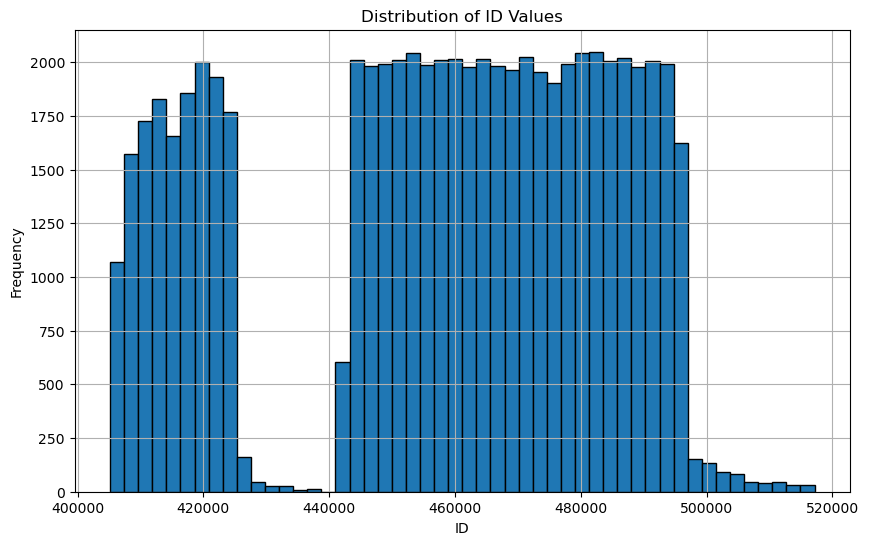

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['ID'], bins=50, edgecolor='k')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.title('Distribution of ID Values')
plt.grid(True)
plt.show()


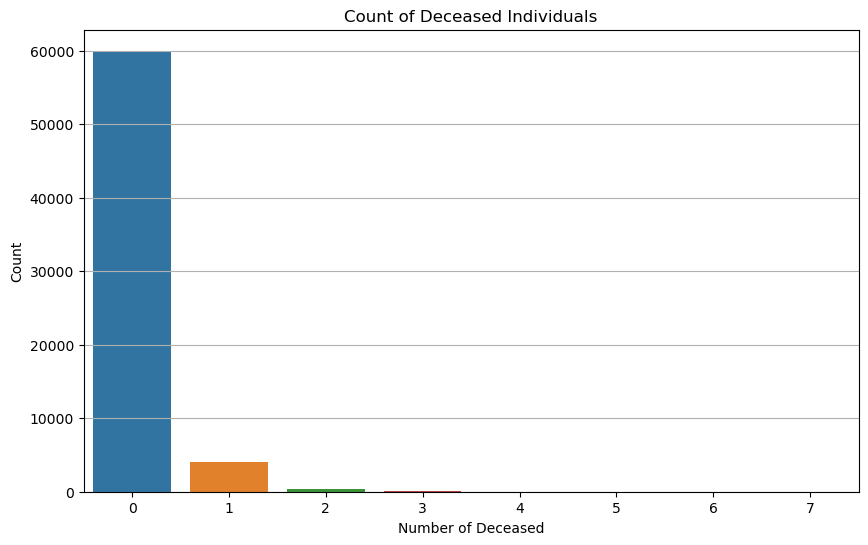

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deceased')
plt.xlabel('Number of Deceased')
plt.ylabel('Count')
plt.title('Count of Deceased Individuals')
plt.grid(axis='y')
plt.show()

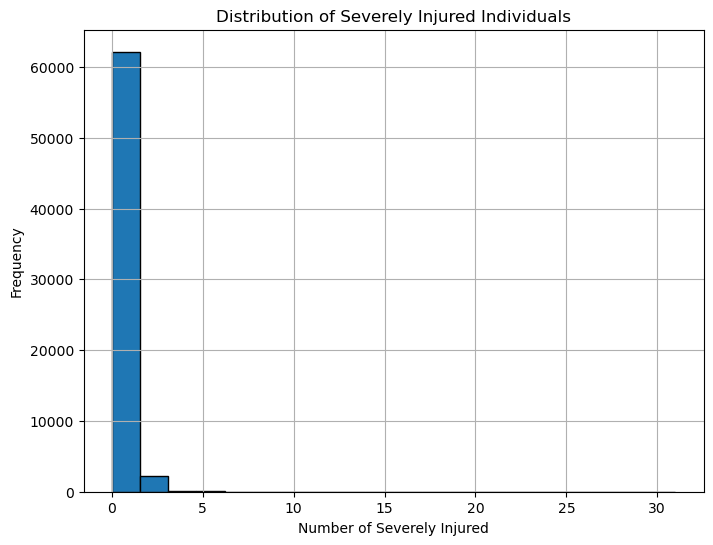

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['severely_injured'], bins=20, edgecolor='k')
plt.xlabel('Number of Severely Injured')
plt.ylabel('Frequency')
plt.title('Distribution of Severely Injured Individuals')
plt.grid(True)
plt.show()


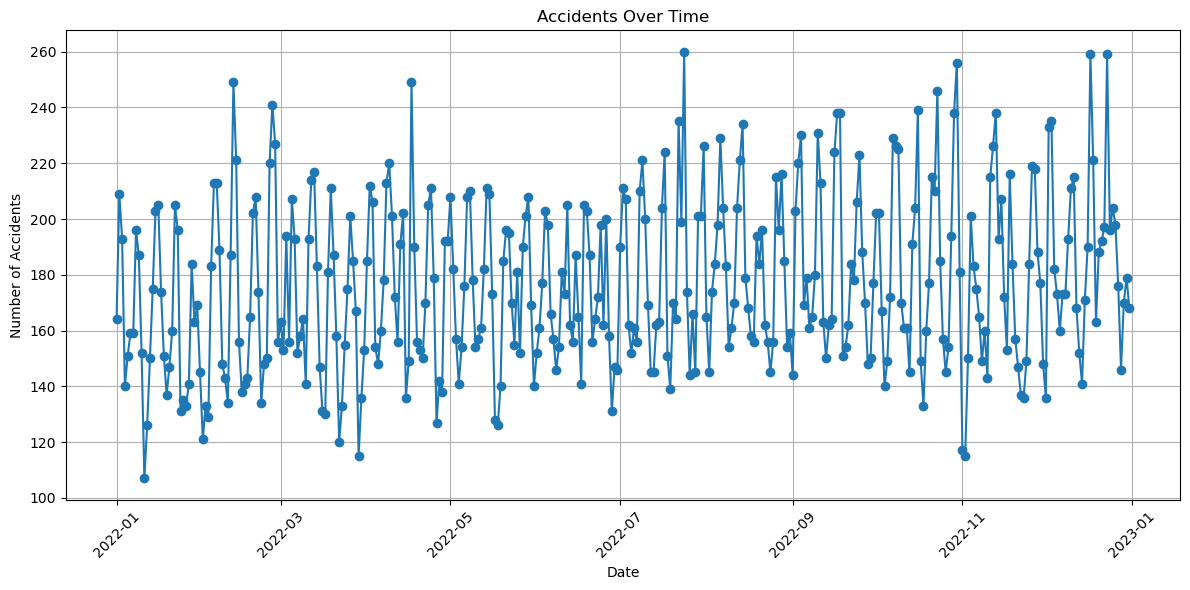

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of accidents for each date
accidents_over_time = df.groupby('date').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(accidents_over_time.index, accidents_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Accidents Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

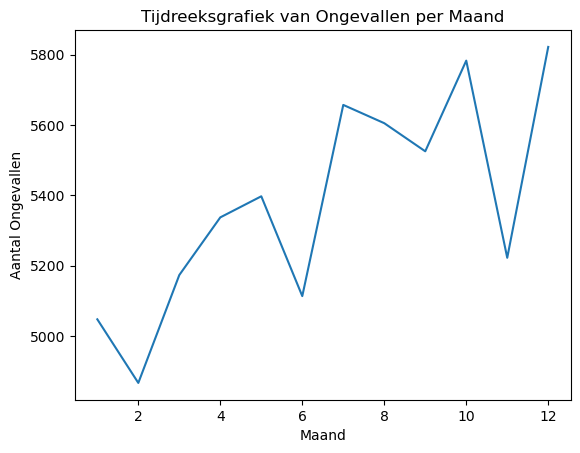

In [9]:
# Voorbeeld: Tijdreeksgrafiek van ongevallen per maand
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
monthly_accidents = df.groupby('month')['ID'].count()
sns.lineplot(x=monthly_accidents.index, y=monthly_accidents.values)
plt.xlabel('Maand')
plt.ylabel('Aantal Ongevallen')
plt.title('Tijdreeksgrafiek van Ongevallen per Maand')
plt.show()

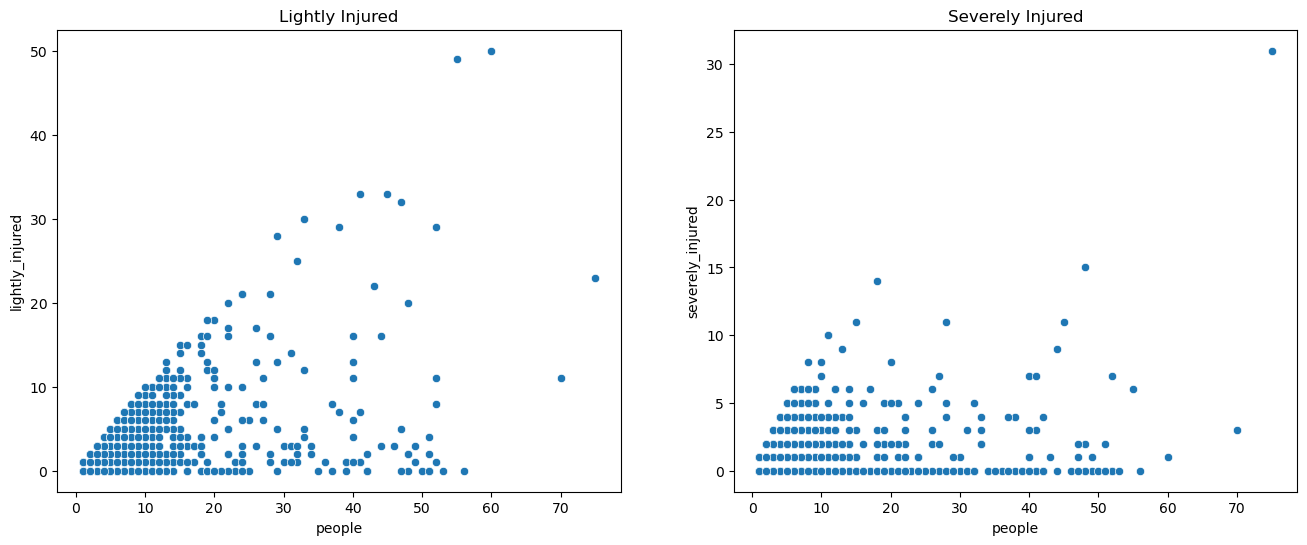

In [10]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='people', y='lightly_injured', data=df, ax=axes[0])
axes[0].set_title('Lightly Injured')

sns.scatterplot(x='people', y='severely_injured', data=df, ax=axes[1])
axes[1].set_title('Severely Injured')

plt.show()

C:\Users\kjeld\AppData\Local\Temp\ipykernel_8428\1652784823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


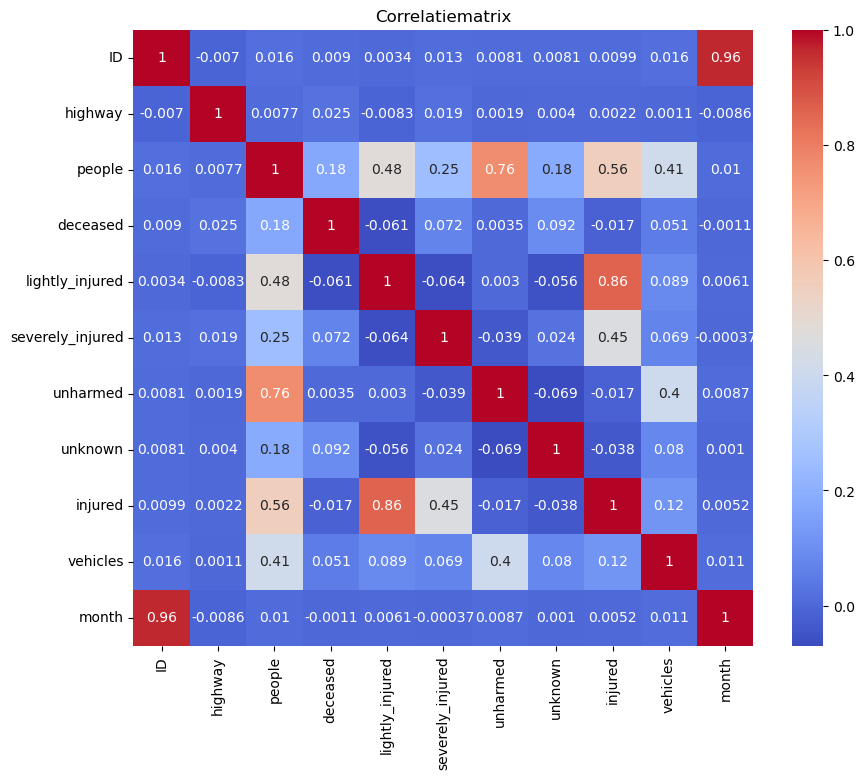

In [11]:

# Voorbeeld: Correlatiematrix en heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix')
plt.show()

C:\Users\kjeld\AppData\Local\Temp\ipykernel_8428\1083095871.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


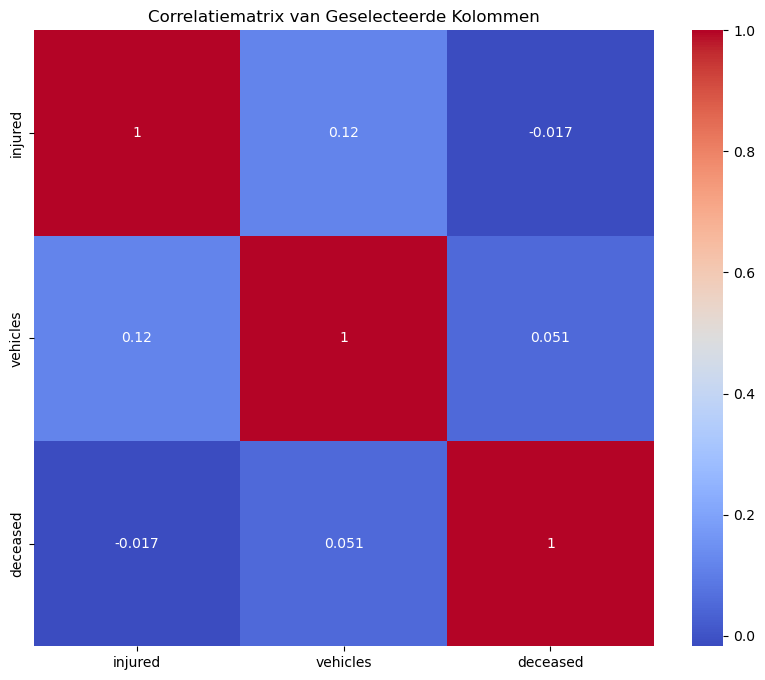

In [12]:
selected_columns = ['injured','weekday', 'vehicles', 'weather_condition', 'deceased']

# Creëer een nieuwe DataFrame met alleen de geselecteerde kolommen
subset_df = df[selected_columns]

# Bereken de correlatiematrix voor de geselecteerde kolommen
correlation_matrix = subset_df.corr()

# Plot de correlatiematrix als een heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix van Geselecteerde Kolommen')
plt.show()

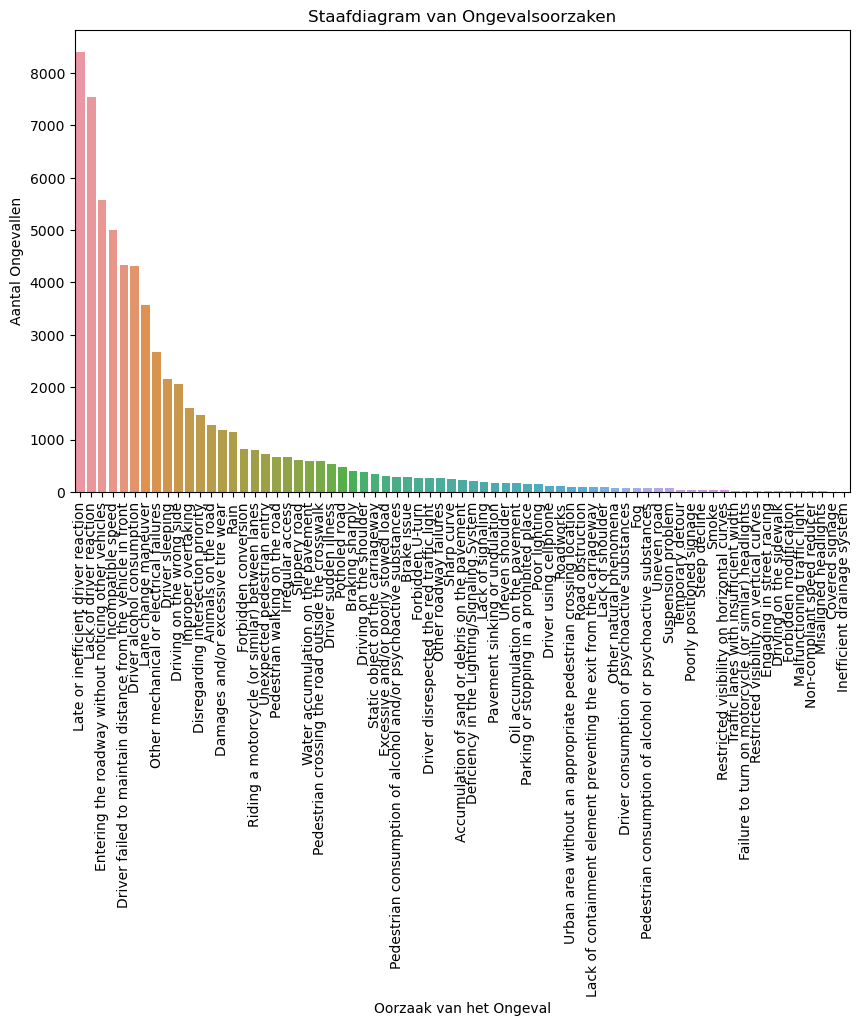

In [14]:
# Voorbeeld: Staafdiagram van ongevalsoorzaken
plt.figure(figsize=(10, 6))
sns.countplot(x='accident_cause', data=df, order=df['accident_cause'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Oorzaak van het Ongeval')
plt.ylabel('Aantal Ongevallen')
plt.title('Staafdiagram van Ongevalsoorzaken')
plt.show()

In [97]:
# Maak een voorbeeld DataFrame
df_nieuw = pd.DataFrame(df)

# Voeg de nieuwe kolom 'accident_cause_cleaned' toe
df_nieuw['accident_cause_cleaned'] = df['accident_cause'].apply(lambda x: 'Weather conditions' if x in ['Fog', 'Rain', 'Smoke'] else (
                                                           'Environmental events' if x in ['Animals on the road', 'Water accumulation on the pavement'] else (
                                                           'Driver is to blame' if x in ['Late or inefficient driver reaction', 
                                                                                       'Lack of driver reaction',
                                                                                       'Driver alcohol consumption',
                                                                                       'Incompatible speed',
                                                                                       'Driver failed to maintain distance from the vehicle in front',
                                                                                       'Driver sleeping',
                                                                                       'Driving on the wrong side', 
                                                                                       'Driver sudden illness',
                                                                                       'Driver disrespected the red traffic light',
                                                                                       'Driver using cellphone',
                                                                                       'Driver consumption of psychoactive substances','Engaging in street racing'] 
                                                                                       else ('Environmental events' if x in ['Animals on the road', 'Water accumulation on the pavement','Slippery road','Potholed road','Accumulation of sand or debris on the pavement',
                                                                                           'Pavement sinking or undulation','Oil accumulation on the pavement','Lack of shoulder',
                                                                                           'Other natural phenomena','Uneven road', 'Steep decline','Other roadway failures','Uneven shoulder'] 
                                                                                           else ('Traffic maneuvers' if x in ['Lane change maneuvers','Improper overtaking','Disregarding intersection priority','Entering the roadway without noticing other vehicles','Forbidden conversion'
                                                                                           ,'Entering the roadway without noticing other vehicles','Driving on the wrong side','Exit from carriageway','Riding a motorcycle (or similar) between lanes','Braking sharply'
                                                                                           ,'Driving on the shoulder','Forbidden U-turn', 'Parking or stopping in a prohibited place','Driving on the sidewalk'] 
                                                                                           else ('Improper or failed equipment' if x in ['Other mechanical or electrical failures','Excessive and/or poorly stowed load'
                                                                                                                                         ,'Brake issue','Covered signage','Malfunctioning traffic light','Damages and/or excessive tire wear','Poor lighting',
                                                                                                                                         'Suspension problem','Deficiency in the Lighting/Signaling System', 'Failure to turn on motorcycle (or similar) headlights','Forbidden modification',
                                                                                                                                         'Non-compliant speed reducer','Misaligned headlights', 'Inefficient drainage system'
                                                                                           ] else ('Traffic situations' if x in ['Driving on the wrong side','Unexpected pedestrian entry','Pedestrian walking on the road',
                                                                                                                                 'Restricted visibility on vertical curves','Restricted visibility on horizontal curves', 'Irregular access','Pedestrian crossing the road outside the crosswalk',
                                                                                                                                 'Lack of signaling','Sharp curve','Road obstruction', 'Roadworks', 'Temporary detour','Static object on the carriageway','Pedestrian consumption of alcohol and/or psychoactive substances', 'Pedestrian consumption of alcohol or psychoactive substances'
                                                                                                                                 , 'Urban area without an appropriate pedestrian crossing location','Lack of containment element preventing the exit from the carriageway','Poorly positioned signage', 'Traffic lanes with insufficient width'
                                                                                           ] else x)))))))

#misschien nog de ongelukken van optellen waar de overheid/regering iets aan kan doen?
#Pedestrian consumption of alcohol and/or psychoactive substances
#Forbidden conversion
# Toon de resulterende DataFrame
df_nieuw

,ID,date,weekday,time,state,highway,kilometer,city,accident_cause,accident_type,...,unknown,injured,vehicles,latitude,longitude,regional,police_station,operational_unit,month,accident_cause_cleaned
0,405151,2022-01-01,Saturday,01:35:00,PI,316.0,415,MARCOLANDIA,Driver alcohol consumption,Rear-end collision,...,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI,1,Driver is to blame
1,405158,2022-01-01,Saturday,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Driver alcohol consumption,Tipping over,...,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,1,Driver is to blame
2,405172,2022-01-01,Saturday,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Driver failed to maintain distance from the ve...,Rear-end collision,...,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS,1,Driver is to blame
3,405203,2022-01-01,Saturday,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Late or inefficient driver reaction,Head-on collision,...,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ,1,Driver is to blame
4,405207,2022-01-01,Saturday,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Water accumulation on the pavement,Exit from carriageway,...,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG,1,Environmental events
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64542,516543,2022-11-06,Sunday,20:00:00,PI,316.0,313,PICOS,Lack of driver reaction,Transverse collision,...,2,1,2,"-7,07959049","-41,44975182",SPRF-PI,DEL04-PI,UOP01-DEL04-PI,11,Driver is to blame
64543,516703,2022-05-03,Tuesday,02:30:00,ES,262.0,17,VIANA,Incompatible speed,Exit from carriageway,...,1,0,1,"-20,38635961","-40,47272969",SPRF-ES,DEL01-ES,UOP01-DEL01-ES,5,Driver is to blame
64544,516707,2022-11-29,Tuesday,19:00:00,MG,146.0,459,BOTELHOS,Driving on the wrong side,Head-on collision,...,0,2,2,"-21,62224461","-46,40968323",SPRF-MG,DEL09-MG,UOP01-DEL09-MG,11,Driver is to blame
64545,516846,2022-07-31,Sunday,09:54:00,CE,116.0,5,FORTALEZA,Lane change maneuver,Tipping over,...,1,1,2,"-3,79654632","-38,50665092",SPRF-CE,DEL01-CE,UOP02-DEL01-CE,7,Lane change maneuver


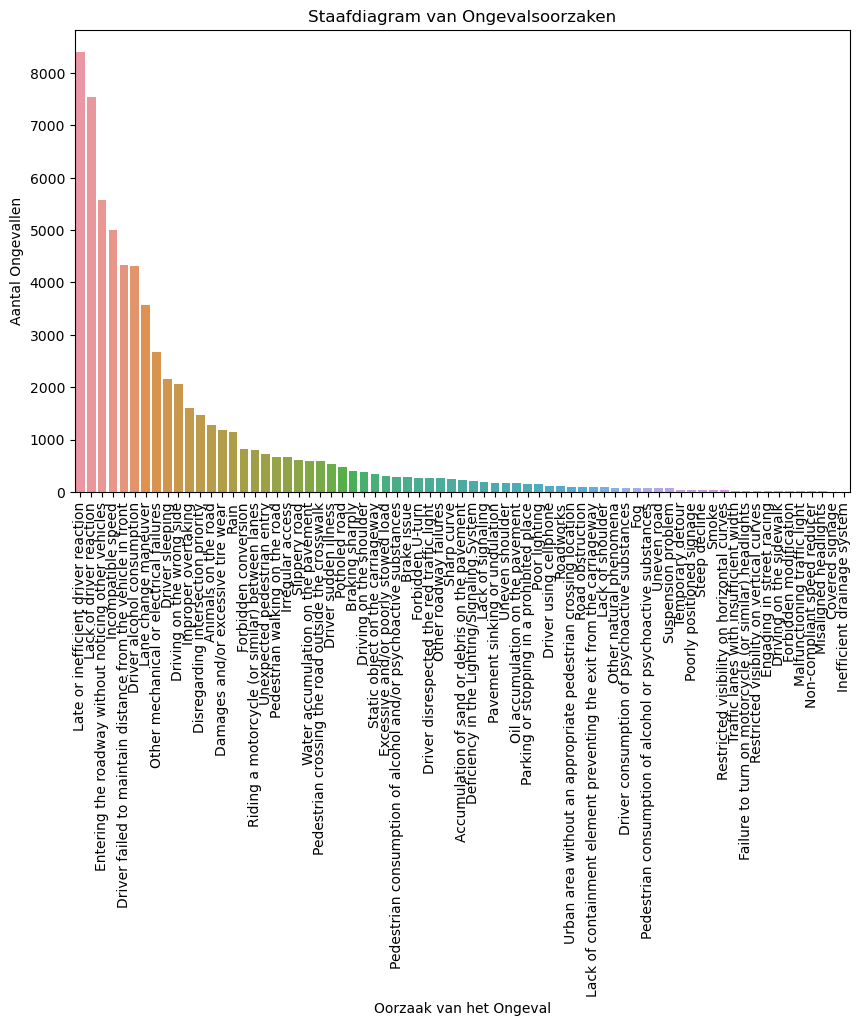

In [99]:
# Voorbeeld: Staafdiagram van ongevalsoorzaken
plt.figure(figsize=(10, 6))
sns.countplot(x='accident_cause', data=df_nieuw, order=df_nieuw['accident_cause'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Oorzaak van het Ongeval')
plt.ylabel('Aantal Ongevallen')
plt.title('Staafdiagram van Ongevalsoorzaken')
plt.show()

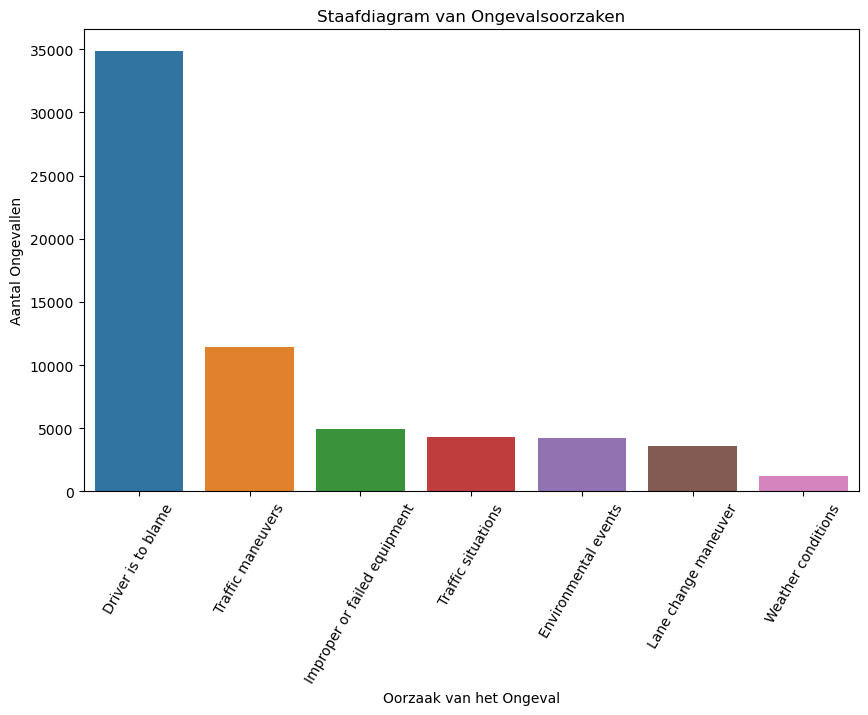

In [113]:
# Voorbeeld: Staafdiagram van ongevalsoorzaken
plt.figure(figsize=(10, 6))
sns.countplot(x='accident_cause_cleaned', data=df_nieuw, order=df_nieuw['accident_cause_cleaned'].value_counts().index)
plt.xticks(rotation=60)
plt.xlabel('Oorzaak van het Ongeval')
plt.ylabel('Aantal Ongevallen')
plt.title('Staafdiagram van Ongevalsoorzaken')
plt.show()

In [100]:
#specifieke histogram voor drivers to blame!
#En vergelijking met soort ongeluk met oorzaak

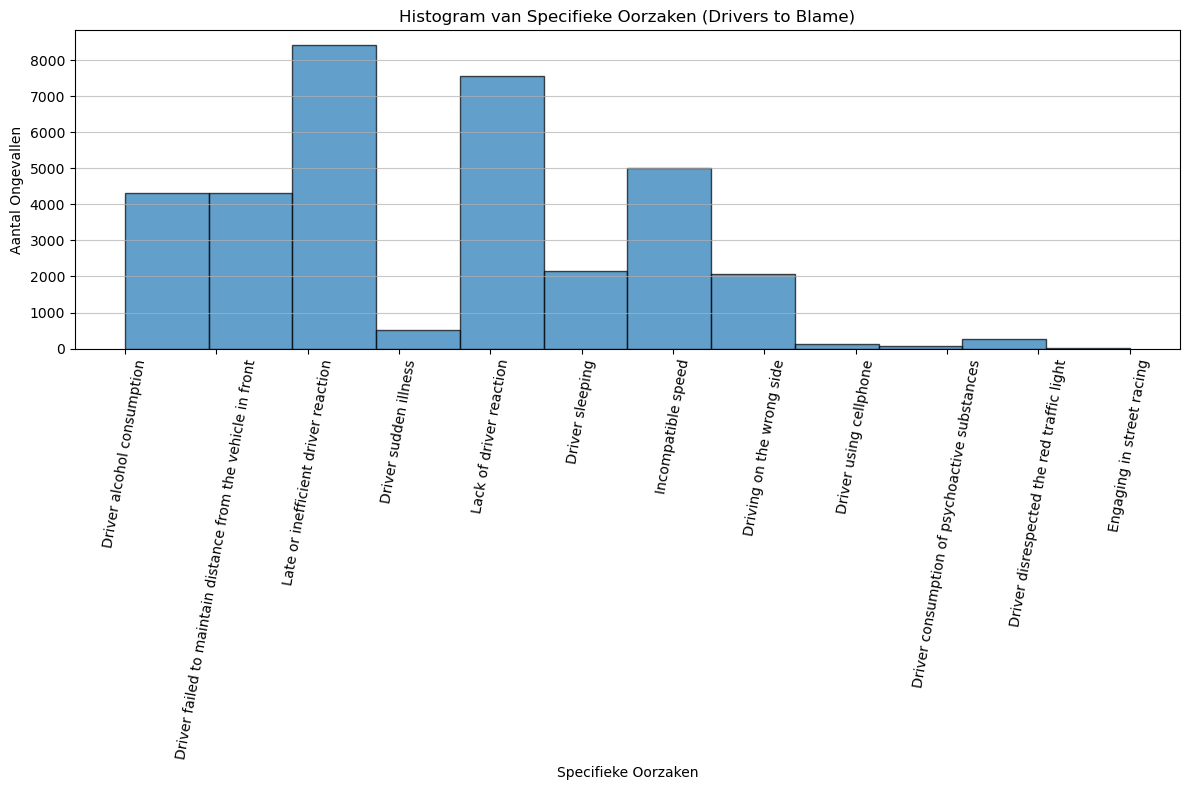

In [112]:
specific_causes = ['Late or inefficient driver reaction', 
                   'Lack of driver reaction',
                   'Driver alcohol consumption',
                   'Incompatible speed',
                   'Driver failed to maintain distance from the vehicle in front',
                   'Driver sleeping',
                   'Driving on the wrong side', 
                   'Driver sudden illness',
                   'Driver disrespected the red traffic light',
                   'Driver using cellphone',
                   'Driver consumption of psychoactive substances',
                   'Engaging in street racing']

# Filter de dataset om alleen de specifieke oorzaken te behouden
filtered_df_driverstoblame = df[df['accident_cause'].isin(specific_causes)]

# Vergroot de grootte van het histogram en voeg een rooster toe
plt.figure(figsize=(12, 8))  # Aangepaste grootte
plt.hist(filtered_df_driverstoblame['accident_cause'], bins=len(specific_causes), edgecolor='k', alpha=0.7)
plt.xlabel('Specifieke Oorzaken')
plt.ylabel('Aantal Ongevallen')
plt.title('Histogram van Specifieke Oorzaken (Drivers to Blame)')
plt.xticks(rotation=80)
plt.grid(axis='y', linestyle='-', alpha=0.7)  # Voeg alleen horizontale lijnen toe
plt.tight_layout()
plt.show()

